---
Title: MindSpore Learen Notes -- QuikStart.
Date: 2024-07-01 12:00
Lang: zh-cn
Category: MindSpore
---


# mindspore介绍
昇思MindSpore是一个全场景深度学习框架，旨在实现易开发、高效执行、全场景统一部署三大目标。
昇思提供一系列配套设施能够为简化深度学习过程，并提供一些工具用于辅助开发AI项目。

## mindspore名词解释

- shuffle(清洗)
数据集随机shuffle可以消除数据排列造成的分布不均问题。

- map(映射，一般用于变换)
map操作是数据预处理的关键操作，可以针对数据集指定列（column）添加数据变换（Transforms），将数据变换应用于该列数据的每个元素，并返回包含变换后元素的新数据集。

- batch(批大小,统一批操作时数据保持相同形状)
将数据集打包为固定大小的batch是在有限硬件资源下使用梯度下降进行模型优化的折中方法，可以保证梯度下降的随机性和优化计算量。

> 设置batch后，在随后的数据集每一次迭代获取数据时，返回一个batch大小的批数据。

- 自定义数据集
mindspore.dataset 模块提供了一些常用的公开数据集(公开数据集请使用download下载，dataset只能加载本地数据集)和标准格式数据集的加载API。

对于MindSpore暂不支持直接加载的数据集，可以构造自定义数据加载类或自定义数据集生成函数的方式来生成数据集，然后通过GeneratorDataset接口实现自定义方式的数据集加载。

GeneratorDataset支持通过可随机访问数据集对象、可迭代数据集对象和生成器(generator)构造自定义数据集，下面分别对其进行介绍。

- 可随机访问数据集
可随机访问数据集是实现了__getitem__和__len__方法的数据集，表示可以通过索引/键直接访问对应位置的数据样本。

- 可迭代数据集
可迭代的数据集是实现了__iter__和__next__方法的数据集，表示可以通过迭代的方式逐步获取数据样本。这种类型的数据集特别适用于随机访问成本太高或者不可行的情况。

- 生成器
生成器也属于可迭代的数据集类型，其直接依赖Python的生成器类型generator返回数据，直至生成器抛出StopIteration异常。

- RGB图像格式
rgb图像是常见的彩色图像格式，但他在计算机内存中的存储顺序通常是按照BGR的顺序排列的。因为在Windows平台上，像素数据是按照BGR的顺序存储在内存中的。因此，当OpenCV之类的图像库读取一张RGB图像时，它会将像素数据按照BGR的顺序排列在内存中，而不是RGB的顺序。

- HWC格式
HWC格式是指按照高度、宽度和通道数的顺序排列图像尺寸的格式。例如，一张形状为256×256×3的RGB图像，在HWC格式中表示为[256, 256, 3]。在一些图像处理库或者底层框架中，例如OpenCV和TensorFlow，通常使用HWC格式表示图像尺寸。

- CHW格式
CHW格式是指按照通道数、高度和宽度的顺序排列图像尺寸的格式。在计算机视觉和深度学习中，通常使用CHW格式表示图像尺寸。如PyTorch等，因此转换CHW格式和HWC格式是有必要的。

## 实战




In [8]:
import mindspore
from mindspore import nn
from mindspore.dataset import vision, transforms
from mindspore.dataset import MnistDataset
print('mindspore base moudle import')

# mindspore.dataset 模块提供api来加载和处理各种常用数据集，如MNIST、CIFAR-10, CIFAR-100, VOC, COCO, ImageNet, CelebA, CLUE等
# 它还支持数据集包括 MindRecord、TFRecord、Manifest等。用户还可以定义他们自己的数据集在这个模块。此外，该模块还提供了在加载时采样数据的api。

mindspore base moudle import


In [6]:
# MNIST_Data数据集下载
# mnist数据集是由美国国家标准与技术研究所提供的手写数字图片数据集
from download import download

url = "https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/" \
      "notebook/datasets/MNIST_Data.zip"
path = download(url, "./", kind="zip", replace=True)


file_sizes: 100%|███████████████████████████| 10.8M/10.8M [00:00<00:00, 136MB/s]
Extracting zip file...
Successfully downloaded / unzipped to ./


In [10]:
print(MnistDataset.__doc__)
# mnist数据集包含以下内容
# mnist_dataset_dir
 # ├── t10k-images-idx3-ubyte (10000个测试图片)
 # ├── t10k-labels-idx1-ubyte (10000个测试标签)
 # ├── train-images-idx3-ubyte (60000个训练图片)
 # └── train-labels-idx1-ubyte (60000个训练标签)


    MNIST dataset.

    The generated dataset has two columns :py:obj:`[image, label]` .
    The tensor of column :py:obj:`image` is of the uint8 type.
    The tensor of column :py:obj:`label` is a scalar of the uint32 type.

    Args:
        dataset_dir (str): Path to the root directory that contains the dataset.
        usage (str, optional): Usage of this dataset, can be ``'train'`` , ``'test'`` or ``'all'`` .
            ``'train'`` will read from 60,000 train samples, ``'test'`` will read from 10,000 test samples,
            ``'all'`` will read from all 70,000 samples. Default: ``None`` , will read all samples.
        num_samples (int, optional): The number of images to be included in the dataset.
            Default: ``None`` , will read all images.
        num_parallel_workers (int, optional): Number of worker threads to read the data.
            Default: ``None`` , will use global default workers(8), it can be set
            by :func:`mindspore.dataset.config.set_num_para

dataset: <class 'mindspore.dataset.engine.datasets_vision.MnistDataset'>
dataset`s cloumns is:  ['image', 'label']


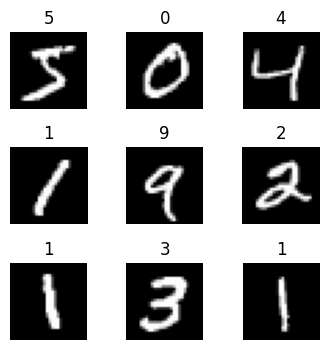

In [30]:
# 查看MNIST_Data数据集内容

import numpy as np
import matplotlib.pyplot as plt
# 加载数据集，包含图像和标签两部分
train_dataset = MnistDataset("MNIST_Data/train", shuffle=False)
print('dataset:', type(train_dataset))
print('dataset`s cloumns is: ', train_dataset.get_col_names())

def visualize(dataset):
    """
    查看数据集中部分内容，这里是图片
    Args:
        dataset (_type_): 数据集
    """
    figure = plt.figure(figsize=(4, 4))
    cols, rows = 3, 3

    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    for idx, (image, label) in enumerate(dataset.create_tuple_iterator()):
        figure.add_subplot(rows, cols, idx + 1)
        plt.title(int(label))
        plt.axis("off")
        plt.imshow(image.asnumpy().squeeze(), cmap="gray")
        if idx == cols * rows - 1:
            break
    plt.show()
visualize(train_dataset)


In [34]:
img, label = next(train_dataset.create_tuple_iterator())
print('the img chw is : ', img.shape) # mnist数据中每张图像是一个25*25的灰度图
print('the label is : ', label)

def datapipe(dataset: MnistDataset, batch_size: int):
    image_transforms = [
        vision.Rescale(1.0 / 255.0, 0), # 将图像进行缩放处理
        vision.Normalize(mean=(0.1307,), std=(0.3081,)), # 将图像进行归一化处理
        vision.HWC2CHW() 
    ]
    label_transform = transforms.TypeCast(mindspore.int32)
    
    dataset = dataset.map(image_transforms, input_columns='image')
    dataset = dataset.map(label_transform, input_columns='label')
    dataset = dataset.batch(batch_size)
    return dataset

the img chw is :  (28, 28, 1)
the label is :  5


In [27]:
# 数据处理
test_dataset = MnistDataset('MNIST_Data/test')

train_dataset = datapipe(train_dataset, 64)
test_dataset = datapipe(test_dataset, 64)

mindspore.dataset.engine.datasets_vision.MnistDataset

### 网络构建
神经网络模型是由神经网络层和Tensor操作构成的，mindspore.nn 提供了常见神经网络层的实现，在MindSpore中，Cell类是构建所有网络的基类，也是网络的基本单元。一个神经网络模型表示为一个Cell，它由不同的子Cell构成。使用这样的嵌套结构，可以简单地使用面向对象编程的思维，对神经网络结构进行构建和管理。

1. 定义模型类
当我们定义神经网络时，可以继承 nn.Cell 类，在__init__方法中进行子Cell的实例化和状态管理，在construct(构造)方法中实现Tensor操作。

**construct意为神经网络（或计算图）构建，相关内容详见使用静态图加速。construct()方法不可直接调用**


In [36]:
class Net(nn.Cell):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.dense_relu_sequential = nn.SequentialCell(
            nn.Dense(28*28, 512),
            nn.ReLU(),
            nn.Dense(512, 512),
            nn.ReLU(),
            nn.Dense(512, 10)
        )
        
    def construct(self, x):
        x = self.flatten(x)
        logits = self.dense_relu_sequential(x)
        return logits
model = Net()
# 查看神经网络结构
print(model)

Net<
  (flatten): Flatten<>
  (dense_relu_sequential): SequentialCell<
    (0): Dense<input_channels=784, output_channels=512, has_bias=True>
    (1): ReLU<>
    (2): Dense<input_channels=512, output_channels=512, has_bias=True>
    (3): ReLU<>
    (4): Dense<input_channels=512, output_channels=10, has_bias=True>
    >
  >


In [38]:
from datetime import datetime
import pytz
print(datetime.now(pytz.timezone('Asia/Shanghai')))

2024-06-28 21:12:18.029531+08:00
